In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Parâmetros

In [2]:
# Definir o número de observações (N) e o número de variáveis (d)
N = 1000
d = 10

# Parâmetros da regressão linear
intercepto = 2
ruido = np.random.randn(N) * 0.5 # distribuição normal padrão (média = 0, desvio padrão = 1)

# Parâmetros do Gradiente Descendente
taxa_aprendizado = 0.1
num_iteracoes = 1500

## Dados

In [3]:
# Gerar dados aleatórios para X
np.random.seed(73)
X = np.random.rand(N, d)

# Gerar coeficientes inteiros aleatórios, incluindo negativos
coeficientes = np.random.randint(-10, 10, size = d)

# Gerar y como uma combinação linear de X com os coeficientes e um intercepto + ruído
y = X.dot(coeficientes) + intercepto + ruido  # y = coeficientes * X + intercepto + ruído

# Verificar os coeficientes gerados
print("Coeficientes gerados:", coeficientes)

# Adicionar uma coluna de 1s para o intercepto
X_b = np.c_[np.ones((N, 1)), X]

Coeficientes gerados: [ -6  -1   4   9  -8 -10   1  -2   2   7]


## Solução Analítica

In [4]:
# Cálculo dos pesos w usando a equação normal
start_time_analitico = time.time()
w_analitico = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
tempo_analitico = time.time() - start_time_analitico

print("Pesos (Solução Analítica):", w_analitico)
print(f"Tempo de processamento da solução analítica: {tempo_analitico:.8f} segundos")

Pesos (Solução Analítica): [ 2.02049226 -6.01662163 -0.98712153  3.99508784  8.94928792 -8.01453353
 -9.99879865  0.90922992 -1.98654579  1.9860569   7.06502182]
Tempo de processamento da solução analítica: 0.00445271 segundos


## Solução Iterativa (Gradiente Descendente)

In [5]:
def calcula_custo(X, y, w):
    N = len(y)
    predicoes = X.dot(w)
    custo = (1/2 * N) * np.sum(np.square(predicoes - y))
    return custo

def gradiente_descendente(X, y, w, taxa_aprendizado, num_iteracoes):
    N = len(y)
    historico_custo = np.zeros(num_iteracoes)
    
    for i in range(num_iteracoes):
        gradiente = X.T.dot(X.dot(w) - y) / N
        w = w - taxa_aprendizado * gradiente
        historico_custo[i] = calcula_custo(X, y, w)
    
    return w, historico_custo

# Inicializar pesos
w_inicial = np.random.randn(d+1)

# Executar Gradiente Descendente
start_time_iterativo = time.time()
w_iterativo, historico_custo = gradiente_descendente(X_b, y, w_inicial, taxa_aprendizado, num_iteracoes)
tempo_iterativo = time.time() - start_time_iterativo

print("Pesos (Solução Iterativa):", w_iterativo)
print(f"Tempo de processamento da solução iterativa: {tempo_iterativo:.8f} segundos")

Pesos (Solução Iterativa): [ 1.96008799 -6.00595405 -0.97467758  4.00761059  8.96082455 -8.00148419
 -9.98577975  0.92131272 -1.97390338  1.99796187  7.07261093]
Tempo de processamento da solução iterativa: 0.06616616 segundos


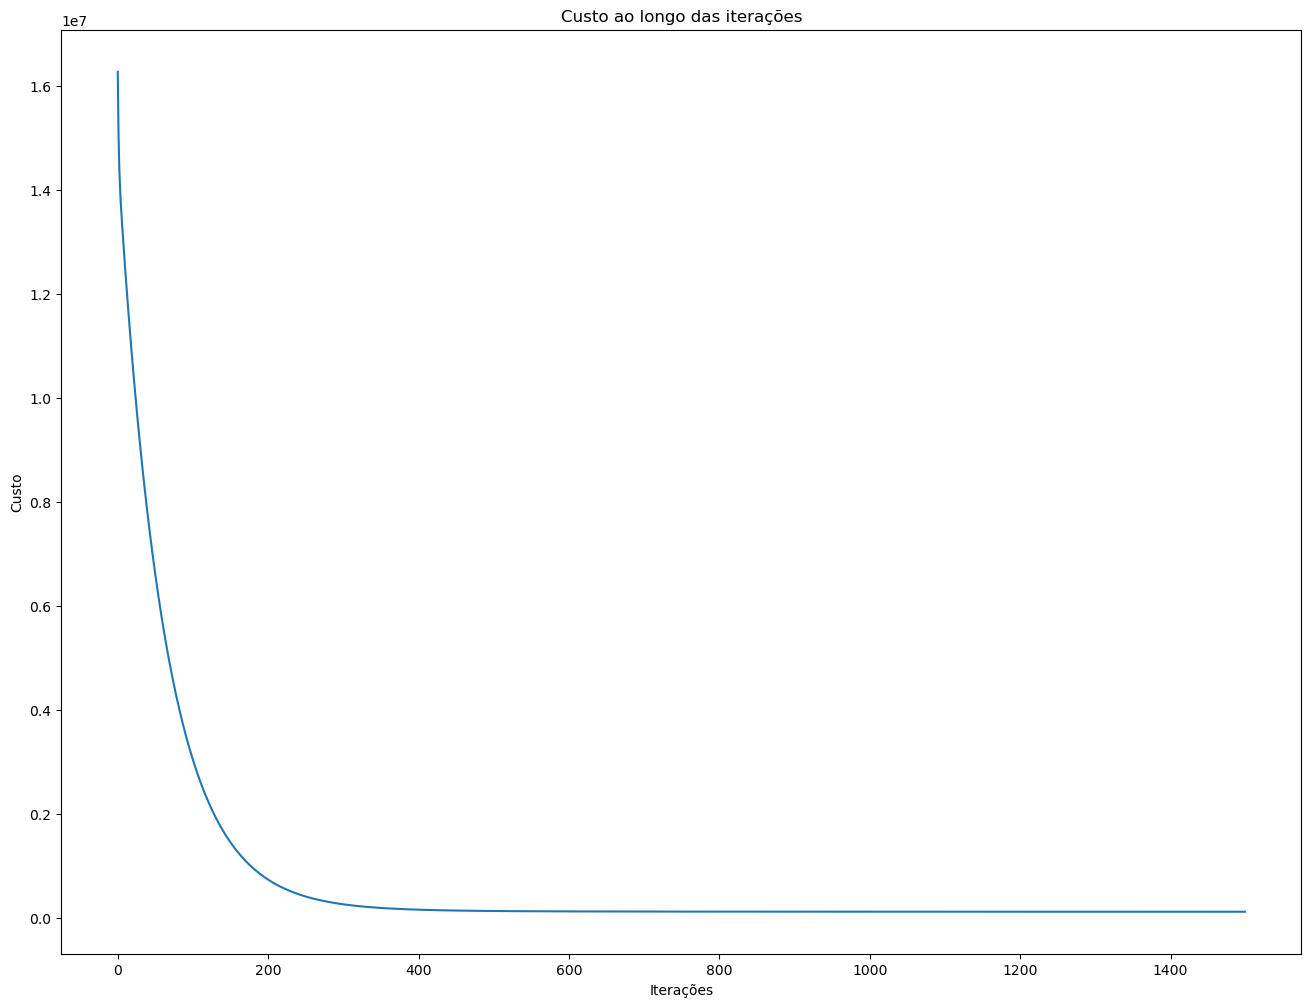

In [6]:
plt.figure(figsize = (16,12))
plt.plot(historico_custo)
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.title("Custo ao longo das iterações")
plt.show()


## Comparar as Soluções

In [7]:
# Comparar as soluções
print("Solução Analítica:")
for i in range(len(w_analitico)):
    print(f"w{i} = {w_analitico[i]:.4f}")

print("\nSolução Iterativa (Gradiente Descendente):")
for i in range(len(w_iterativo)):
    print(f"w{i} = {w_iterativo[i]:.4f}")

Solução Analítica:
w0 = 2.0205
w1 = -6.0166
w2 = -0.9871
w3 = 3.9951
w4 = 8.9493
w5 = -8.0145
w6 = -9.9988
w7 = 0.9092
w8 = -1.9865
w9 = 1.9861
w10 = 7.0650

Solução Iterativa (Gradiente Descendente):
w0 = 1.9601
w1 = -6.0060
w2 = -0.9747
w3 = 4.0076
w4 = 8.9608
w5 = -8.0015
w6 = -9.9858
w7 = 0.9213
w8 = -1.9739
w9 = 1.9980
w10 = 7.0726


In [8]:
print(f"Tempo de processamento da solução analítica: {tempo_analitico:.8f} segundos")
print(f"Tempo de processamento da solução iterativa: {tempo_iterativo:.8f} segundos")

Tempo de processamento da solução analítica: 0.00445271 segundos
Tempo de processamento da solução iterativa: 0.06616616 segundos


<hr style="border: 2px #000 solid;width: 80%;">